<a href="https://colab.research.google.com/github/ShubhamP1028/DeepLearningTute/blob/main/Tensorflow_MCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tensorflow Multi class neuron using Iris(flower) dataset

*  A multi-class neuron layer means we have multiple output neurons, each corresponding to a different class.

*  Classes: Setosa, Versicolor, Virginica
Output layer: 3 neurons

*  Common activation for output layer: Softmax
Softmax converts raw outputs (logits) into probabilities that sum to 1.

*  Common loss function: Categorical Crossentropy
Measures how far predicted probability distribution is from the true class.

In [3]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
import numpy as np

In [4]:
iris = load_iris()
X = iris.data  # features
y = iris.target.reshape(-1, 1)  # labels

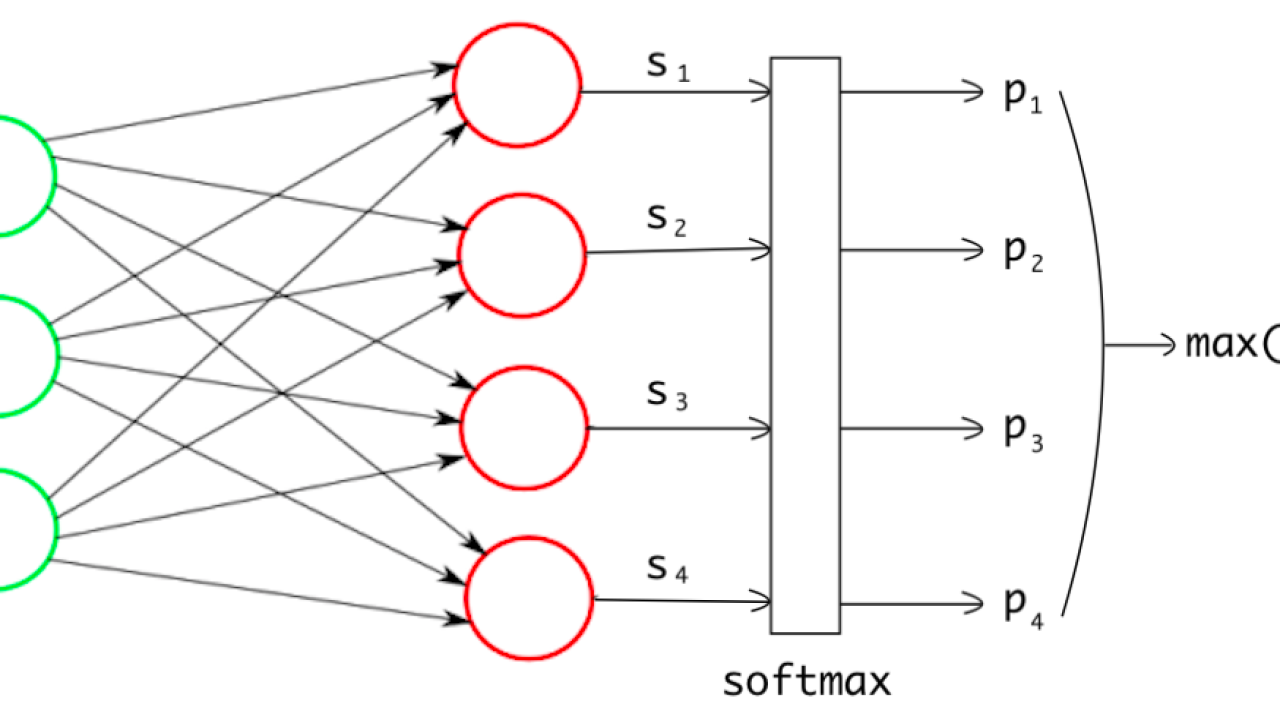

In [6]:
# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

In [7]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [9]:
# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),  # Hidden layer
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer for 3 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Dense(3, activation='softmax') → multi-class neuron output layer.

categorical_crossentropy → correct loss for one-hot encoded multi-class classification.

adam optimizer → uses gradient descent + adaptive learning rate.



In [10]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
# training
history = model.fit(X_train, y_train, epochs=5, batch_size=5, validation_data=(X_test, y_test))

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9839 - loss: 0.1460 - val_accuracy: 0.9667 - val_loss: 0.1547
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9861 - loss: 0.1746 - val_accuracy: 0.9667 - val_loss: 0.1498
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9528 - loss: 0.1794 - val_accuracy: 0.9667 - val_loss: 0.1449
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9552 - loss: 0.1919 - val_accuracy: 0.9667 - val_loss: 0.1402
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9334 - loss: 0.1705 - val_accuracy: 0.9667 - val_loss: 0.1364
